In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from LyaPlotter.file_types import FilesBase

In [3]:
x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_N_clustering.dat.fits')

In [10]:
data_full.file_paths

['/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_N_clustering.dat.fits']

In [44]:
data_full = FilesBase('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_clustering.dat.fits')
data_S = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_S_clustering.dat.fits')
data_N = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_N_clustering.dat.fits')

In [25]:
assert np.all(np.in1d(data_S.z, data_full.z))
assert np.all(np.in1d(data_N.z, data_full.z))
assert data_full.N_obj == data_N.N_obj + data_S.N_obj

In [26]:
ran_full = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_0_clustering.ran.fits')

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.

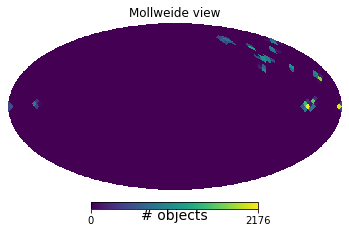

In [29]:
data_full.plot_footprint()

In [31]:
ran_full.N_obj

425027

In [32]:
data_full.N_obj

36113

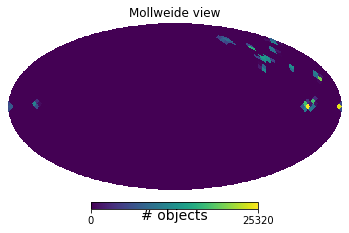

In [30]:
ran_full.plot_footprint()

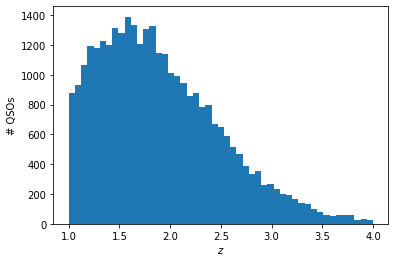

In [28]:
data_full.plot_dist()

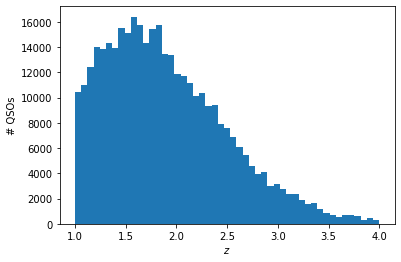

In [27]:
ran_full.plot_dist()

In [39]:
np.bincount(data.healpixels)

array([  0,   0,   0, ...,   0,   0, 443])

In [54]:
12*16**2

3072

In [58]:
data_full.healpixels == 3072

array([False, False, False, ..., False, False, False])

In [70]:
bincount = np.bincount(data_full.healpixels, minlength=3072)

In [71]:
mask = bincount > 0

In [77]:
for pixel in pixels[mask]:
    print(int(pixel), '\t', (data_full.healpixels == pixel).sum())

571 	 752
583 	 988
589 	 620
594 	 166
600 	 30
613 	 1092
614 	 904
615 	 1107
617 	 430
620 	 943
621 	 1
624 	 484
626 	 4
634 	 1269
637 	 564
639 	 806
648 	 840
650 	 977
657 	 1118
669 	 21
671 	 129
700 	 22
701 	 951
702 	 130
703 	 730
709 	 2
712 	 820
714 	 909
720 	 444
725 	 585
744 	 101
746 	 4
958 	 456
959 	 654
1002 	 443
1599 	 464
1619 	 841
1620 	 876
1621 	 560
1622 	 2176
1623 	 1491
1625 	 863
1627 	 79
1628 	 169
1629 	 311
1630 	 1610
1640 	 27
1642 	 2115
1643 	 6
1652 	 255
1685 	 529
1702 	 431
1703 	 932
1708 	 51
1709 	 317
1728 	 488
1751 	 76
1757 	 1786
1759 	 164


In [81]:
data_mask = data_full.healpixels == 634
ran_mask = ran_full.healpixels == 634

In [84]:
masked_data = FilesBase('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_clustering.dat.fits', mask=data_mask)
masked_rand = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_0_clustering.ran.fits', mask=ran_mask)

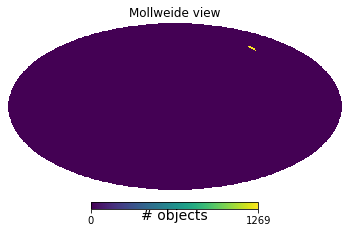

In [85]:
masked_data.plot_footprint()

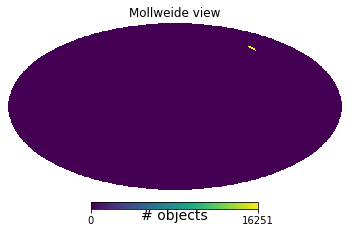

In [86]:
masked_rand.plot_footprint()

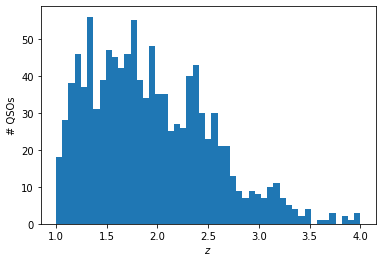

In [88]:
masked_data.plot_dist()

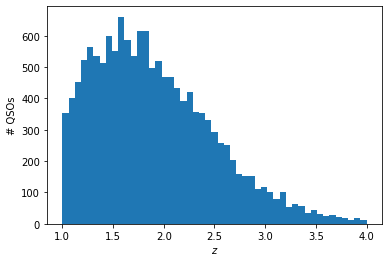

In [89]:
masked_rand.plot_dist()

It seems that the random distribution is independent from the pixel chosen:

In [90]:
data_mask = data_full.healpixels == 1630
ran_mask = ran_full.healpixels == 1630

In [91]:
masked_data = FilesBase('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_clustering.dat.fits', mask=data_mask)
masked_rand = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_0_clustering.ran.fits', mask=ran_mask)

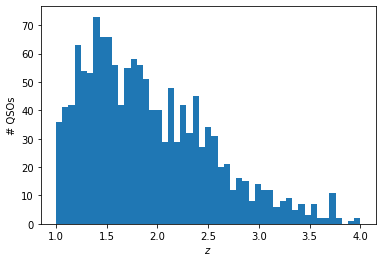

In [92]:
masked_data.plot_dist()

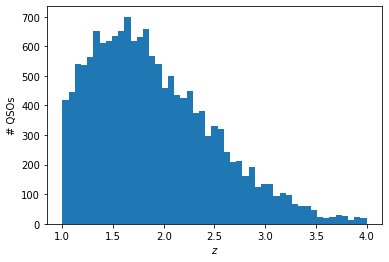

In [93]:
masked_rand.plot_dist()

What about the number of objects in each pixel:

In [96]:
for pixel in pixels[mask]:
    data_mask = data_full.healpixels == pixel
    ran_mask = ran_full.healpixels == pixel
    print(int(pixel), '\t', data_mask.sum(), '\t', ran_mask.sum()/data_mask.sum())

571 	 752 	 12.367021276595745
583 	 988 	 11.955465587044534
589 	 620 	 12.806451612903226
594 	 166 	 12.25301204819277
600 	 30 	 10.233333333333333
613 	 1092 	 11.531135531135531
614 	 904 	 12.991150442477876
615 	 1107 	 12.681120144534779
617 	 430 	 11.76046511627907
620 	 943 	 13.69777306468717
621 	 1 	 3.0
624 	 484 	 12.107438016528926
626 	 4 	 11.75
634 	 1269 	 12.80614657210402
637 	 564 	 11.797872340425531
639 	 806 	 11.240694789081886
648 	 840 	 11.110714285714286
650 	 977 	 11.065506653019447
657 	 1118 	 11.31484794275492
669 	 21 	 10.571428571428571
671 	 129 	 11.62015503875969
700 	 22 	 8.136363636363637
701 	 951 	 11.753943217665615
702 	 130 	 8.36923076923077
703 	 730 	 11.094520547945205
709 	 2 	 3.0
712 	 820 	 11.765853658536585
714 	 909 	 10.630363036303631
720 	 444 	 12.554054054054054
725 	 585 	 11.548717948717949
744 	 101 	 10.237623762376238
746 	 4 	 4.75
958 	 456 	 11.43421052631579
959 	 654 	 10.891437308868502
1002 	 443 	 11.3521

Super empty pixels don't have randoms also, but there is no clear relation...